In [1]:
import pandas as pd
import numpy as np
from ggplot import *

In [2]:
BaseModel = pd.read_csv('xgb_0.95label.csv')
BaseModelAveraged = pd.read_csv('0.70.3TwoBestBaseModelTogether.csv')
TargetSQRM = pd.read_csv('Retesting3+xgb+additional+subsampled+average_price+0.95label.csv')
SubareaPrice = pd.read_csv('submission_20170530_avg_subarea_price.csv')
TSNE = pd.read_csv('xgb_0.95label_tsne_kremlin_others_param_tuning.csv')
AveragePrice = pd.read_csv('use_avg_price_by_full_sq_only_rub.csv')
PriceType = pd.read_csv('price_related_type_2.csv')

In [3]:
StackingThreeXGB31437 = pd.read_csv('Stacking_Gap_Best_SQRM_without_first_20%_data.csv')
Stacking31576 = pd.read_csv('Stacking_0628_FinalRounds.csv')
Stacking31638 = pd.read_csv('Stacking_3SKlearn_3xgb_correct.csv')
Stacking31724 = pd.read_csv('Stacking_xgb3_and_2_and_RF_corrected333.csv')
Stacking31819 = pd.read_csv('Stacking_xgb3_and_2_and_RF_corrected.csv')

In [4]:
mistake1 = pd.read_csv('xgb+additional+subsampled+average_price+0.95label.csv')
mistake2 = pd.read_csv('xgb+additional+subsampled+low_average_price+0.95label.csv')
location1 = pd.read_csv('AddLocationAndFE.csv')
location2 = pd.read_csv('AddLocationNoFE.csv')
Gap = pd.read_csv('Test_UseGapAsTarget.csv')

In [16]:
CurrentBest = pd.read_csv('Log_Average_Best_Single_And_Gap_And_Area_Price.csv')
p0 = CurrentBest['price_doc']

In [17]:
ZheBest = pd.read_csv('test_weighted_average.csv')
p1 = ZheBest['price_doc']

In [25]:
predict_difference = pd.read_csv('predict_difference.csv')

In [20]:
from sklearn.metrics import mean_squared_error as MSE

In [23]:
def compare_sub(sub1,sub2):
    diff = sub1['price_doc'] - sub2['price_doc']
    tmp = pd.DataFrame({'id':BaseModel['id'],'diff':diff})
    g = ggplot(tmp,aes(x='id',y='diff')) + geom_line()
    print(g)
    print(sum(diff)/len(sub1))
    print(MSE(sub1['price_doc'],sub2['price_doc']))

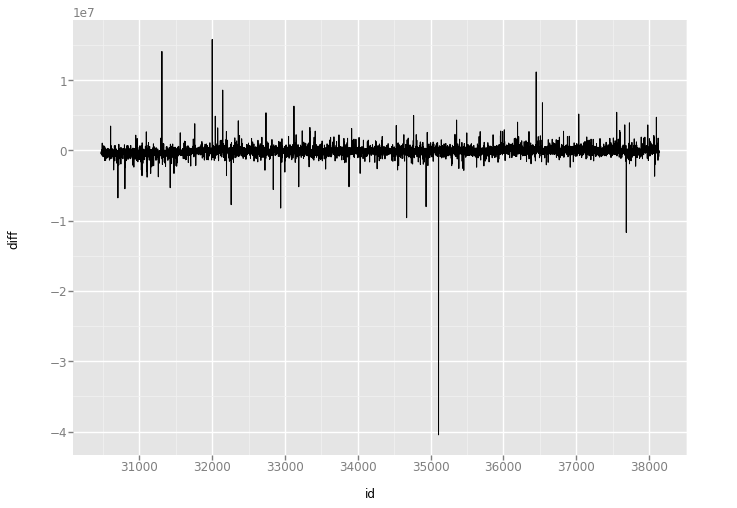

<ggplot: (8782324787078)>
-103169.058666
724156907784.0


In [34]:
compare_sub(BaseModel,Stacking31576)

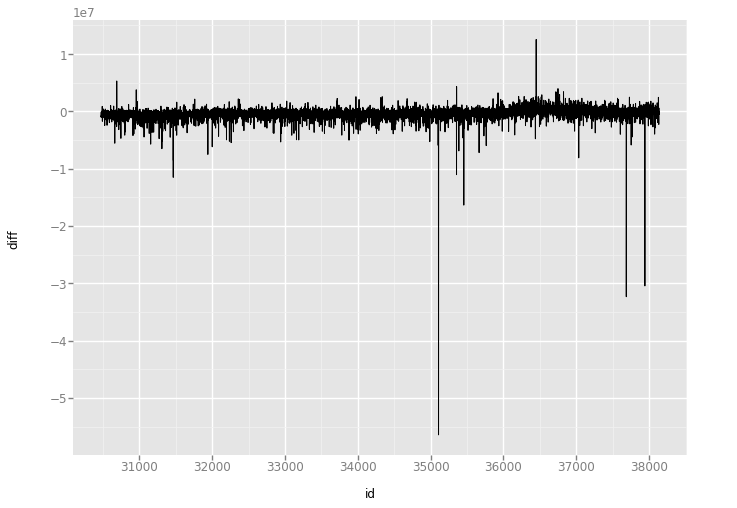

<ggplot: (-9223363254529977449)>
-402389.509904
1.65642822004e+12


In [31]:
compare_sub(BaseModel,predict_difference)

In [35]:
p1 = BaseModel['price_doc']
p2 = mistake1['price_doc']
p3 = mistake2['price_doc']

In [38]:
p4 = SubareaPrice['price_doc']

In [58]:
p2p3 = np.exp(np.log(p2)*0.5+np.log(p3)*0.5)

In [59]:
p1p2p3 = np.exp(np.log(p1)*0.5+np.log(p2p3)*0.5)

In [75]:
p1p2p3p4 = np.exp(np.log(p1p2p3)*0.75 + np.log(p4)*0.25)

In [76]:
p1p2p3p4p5 = np.exp(np.log(p1p2p3p4)*0.75 + np.log(predict_difference['price_doc'])*0.25)

In [83]:
p1p2p3p4p5p6 = np.exp(np.log(p1p2p3p4)*0.7 + np.log(predict_difference['price_doc'])*0.2 + np.log(PriceType['price_doc'])*0.1)

In [81]:
sum(CurrentBest['price_doc'] -p)/len(BaseModel)

11721.972703006748

In [84]:
sum(CurrentBest['price_doc'] -p1p2p3p4p5p6)/len(BaseModel)

2659.0663287856346

In [85]:
MSE(CurrentBest['price_doc'],p1p2p3p4p5p6)**0.5

235160.28090701631

In [86]:
sub = pd.DataFrame({'id':BaseModel['id'],'price_doc':p1p2p3p4p5p6})

In [87]:
sub.to_csv('Six_Results_Together.csv',index=False)

In [80]:
p = pd.read_csv('Best_Results_Adjust_Weights.csv')['price_doc']

In [55]:
p1p2p3p4

0       5.389946e+06
1       8.384757e+06
2       5.290677e+06
3       5.778368e+06
4       4.956566e+06
5       9.118421e+06
6       4.165471e+06
7       4.242639e+06
8       4.664205e+06
9       4.758851e+06
10      6.243451e+06
11      4.730954e+06
12      3.593996e+06
13      3.938085e+06
14      6.185580e+06
15      6.143532e+06
16      2.183411e+07
17      1.938950e+07
18      5.751905e+06
19      1.325865e+07
20      6.895979e+06
21      1.023417e+07
22      8.300938e+06
23      8.354501e+06
24      4.586889e+06
25      8.253161e+06
26      1.097696e+07
27      6.891939e+06
28      3.120706e+06
29      6.620826e+06
            ...     
7632    6.221213e+06
7633    3.300141e+06
7634    1.089699e+07
7635    5.483189e+06
7636    4.596109e+06
7637    4.874101e+06
7638    3.707723e+06
7639    7.109234e+06
7640    8.015141e+06
7641    3.591659e+06
7642    6.852164e+06
7643    6.091113e+06
7644    6.827880e+06
7645    3.254667e+06
7646    6.535752e+06
7647    4.759136e+06
7648    6.896

In [10]:
Average_Stacking = np.log(StackingThreeXGB31437['price_doc']) + np.log(Stacking31576['price_doc'])+ np.log(Stacking31638['price_doc']) + np.log(Stacking31724['price_doc']) + np.log(Stacking31819['price_doc']) 

In [11]:
Average_Stacking = np.exp(Average_Stacking/5)

In [13]:
sub = pd.DataFrame({'id':BaseModel['id'],'price_doc':Average_Stacking})

In [14]:
sub.to_csv('Averaging_Stackings.csv',index=False)